<a href="https://colab.research.google.com/github/alexcohenn23/bio108tutorial/blob/main/Week_7_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 7 Homework Analysis


### Motivation and Overarching Question: How does deforestation amplify/affect Species Richness of Threateneded Bird Species:

With approximately 1 in 8 bird species facing extinction ([BirdLife International](https://colab.research.google.com/drive/12hvrMlGyxL2cdXbXuxX5hgtQMb29IWpw#scrollTo=Y8lrmzMqaEys&line=3&uniqifier=1)), it is important to determine the largest factors attributing to the loss of bird diversity. At the same time, roughly two-thrids of bird species reside in forests with many of those uniquely found in one type of habitat/forest. Due to this, it is important to consider the effect that deforestation due to factors like agricultural expansion or logging may contribute to the loss of bird diversity



By overlaying maps of species richness of threatened bird species and the most popular zones of deforestation, it is easier to identify the correlation of the two variables and its resulting outcome on where theatended bird species reside.

In [4]:
#Step #1 Import required packages for analysis:

In [3]:
! pip install rasterio
! pip install rasterstats
! pip install earthpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 113.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 20.4 MB/s eta 0:00:00


In [5]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import shapely
import geopandas as gpd
import rasterio
import rasterio.plot
import rasterio.mask
import rasterio.features
import rasterstats
from rasterio.mask import mask
from rasterio.warp import reproject, Resampling
from rasterio.crs import CRS


# Load the box module from shapely to create box objects
from shapely.geometry import box
import earthpy as et
import seaborn as sns

# Ignore warning about missing/empty geometries
import warnings
warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)

# Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style("white")

# Set working dir & get data
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))


Extracted output to /root/earth-analytics/data/spatial-vector-lidar/.


In [6]:
#### Packages we must install - may use leafmap
#import leafmap
import fiona
import geopandas as gpd

### Step #2: Import Raster data in

Link to google drive of data: https://drive.google.com/drive/folders/17tIg5jbgyh909ZtY7XKxPgAo4gIw68S0



In [7]:
# Importing Data In:
# importing data in
from google.colab import drive
drive.mount('/content/drive')


#not entirely sure what each tif/raster data file contains but each holds one part of the raster file
ovr = "/content/drive/MyDrive/BIOL108/Birds_THR_SR_2024/Birds_THR_SR_2024.tif.ovr"
src_ovr = rasterio.open(ovr)

tif = "/content/drive/MyDrive/BIOL108/Birds_THR_SR_2024/Birds_THR_SR_2024.tif"
src_tif = rasterio.open(tif)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [8]:
src_tif.meta

{'driver': 'GTiff',
 'dtype': 'int8',
 'nodata': -128.0,
 'width': 1204,
 'height': 592,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["World_Mollweide",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Mollweide"],PARAMETER["central_meridian",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(30000.0, 0.0, -18058187.677929368,
        0.0, -30000.0, 8764905.85562796)}

### Step #3: Plotting Raster data files

<Axes: >

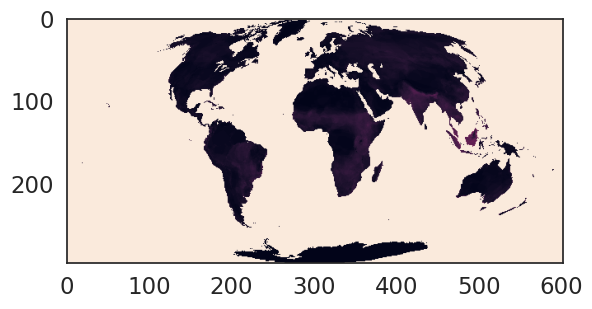

In [9]:
#plotting first layer/part of the raster data image

fig, ax = plt.subplots()
rasterio.plot.show(src_ovr, ax=ax)

<Axes: >

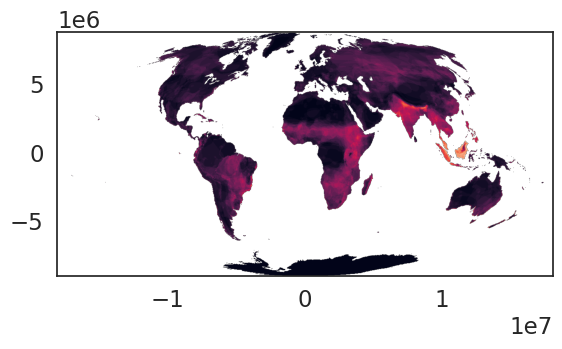

In [10]:
#plotting second part/layer of the raster data image

fig, ax = plt.subplots()
rasterio.plot.show(src_tif, ax=ax)

##Importing Vector Data In

```Using data from https://globil-panda.opendata.arcgis.com/datasets/46b29ddaf2a54730844000ce8c431f83/about for deforestation data. To discover if there is a correlation between species richness for threatened species and deforestation hotspots.```

In [11]:
deforest_shp = '/content/drive/MyDrive/BIOL108/def_fronts/New_Deforestation_Fronts_wgs.shp'
deforest = gpd.read_file(deforest_shp)
deforest = deforest.to_crs(src_tif.crs)

In [12]:
deforest.crs

<Projected CRS: ESRI:54009>
Name: World_Mollweide
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Mollweide
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

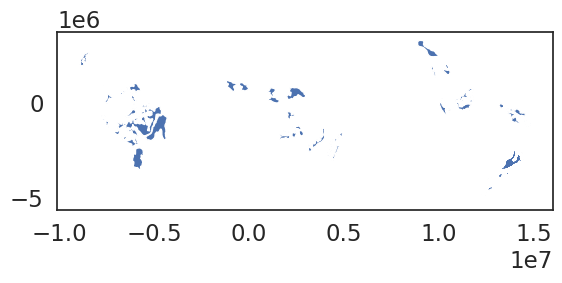

In [13]:
#looking at blank deforest plot to ensure data is properly aligned/plotted

deforest.plot()




### Putting all data/plots together:

'able to see how the threatened bird species richness vaires across the world. Threatened bird species are most popolous in Africa, South America,\nand Southern Asia.'

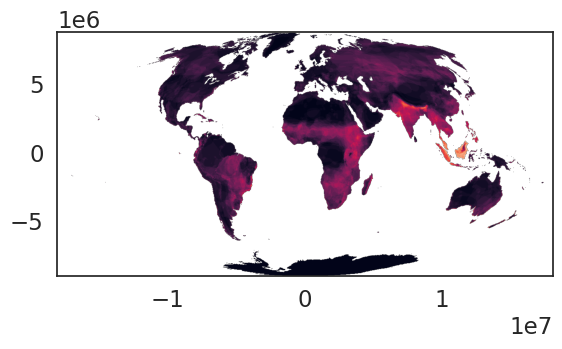

In [14]:
#plotting both parts/layers of the raster data together to create cohesive map of threatened species richness


fig, ax = plt.subplots()
rasterio.plot.show(src_tif, src_ovr, ax=ax)


'''able to see how the threatened bird species richness vaires across the world. Threatened bird species are most popolous in Africa, South America,
and Southern Asia.'''

<Axes: title={'center': 'Threatened Birds Species Richness'}>

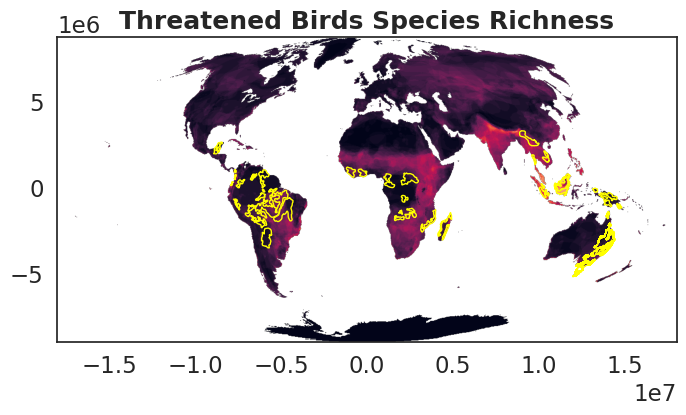

In [15]:
#Combining both the raster and vector data files to plot analysis:

fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(src_tif, src_ovr, ax=ax, title="Threatened Birds Species Richness")
deforest.plot(ax=ax, edgecolor="yellow", facecolor="none", lw=1)

The plot above illustrates that the most notable instances of deforestation generally occur on the outer ring of high densities of threatened bird species on the heat map.

---



# Week 10 Revisions/Additions:



For Week 10, the main focus is to delve further into deforestation in tropical forests, namely in South America and Indonesia. Due to this, the goal of this week's analysis is to create two cropped maps of South America and South East Asia in order to get a clearer understanding of how the deforestation of tropical forests are affecting the biodiversity in bird species. Estimates suggest that up to 72% of bird species reside in tropical forests ([Pillay et al.](https://esajournals.onlinelibrary.wiley.com/doi/10.1002/fee.2420#:~:text=Our%20analyses%20revealed%20that%20tropical,tropical%20forests%20(Figure%201a).)). Therefore, it is important to understand the extent to which the deforestation of tropical forests are affecting the density of threatened bird species and what habitats/topography deforestation of tropical forests is forcing birds to migrate to.

### Analysis 1 and 1.5: Cropping World Map to Create Two Cropped Maps of South America and South East Asia:


Link to World Country Boundary Map: [ne_50m_land](https://drive.google.com/drive/folders/1WQGbKLukcYumYkw04CxD9FQCQK-h_DuM?usp=sharing)

<Axes: title={'center': 'Threatened Birds Species Richness in SE Asia'}>

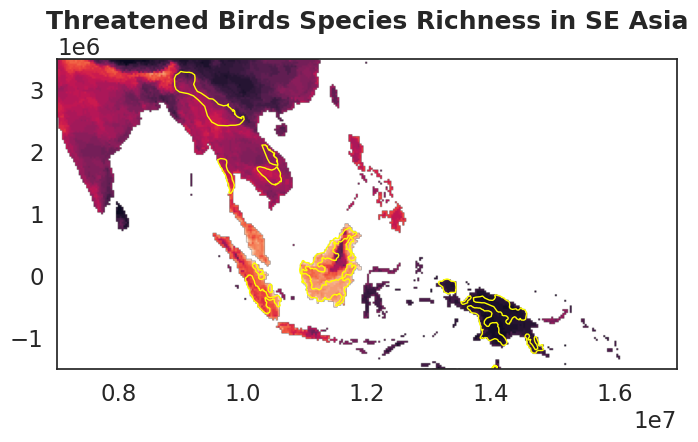

In [95]:
'''Was not able to completely determine how to crop map above using Geopandas
 to reference specific boundaries (continent/region).
Therefore, used the axes above as an impromptu method to crop maps'''

# Croppped Map of SE Asia:

#Combining both the raster and vector data files to plot analysis:

fig, ax = plt.subplots(figsize=(8, 8))

ax.set_ylim((-1500000, 3500000))
ax.set_xlim((7000000, 17000000))

rasterio.plot.show(src_tif, src_ovr, ax=ax, title="Threatened Birds Species Richness in SE Asia")
deforest.plot(ax=ax, edgecolor="yellow", facecolor="none", lw=1)

#### Analysis of Map Above: Deforestation in South East Asia can be seen to generally be at the most critical locations where dense populations of threatened bird species reside. This may suggest that threatened bird species in the area are unable to adapt to new climates, or are unable to relocate due to being on an island (ie. Indonesia and Malaysia/Brunei). In the non-island portion of SE Asia, deforestation hotspots does not present a possible or distinctive relationship with density of threatened bird species.

<Axes: title={'center': 'Threatened Birds Species Richness in South America'}>

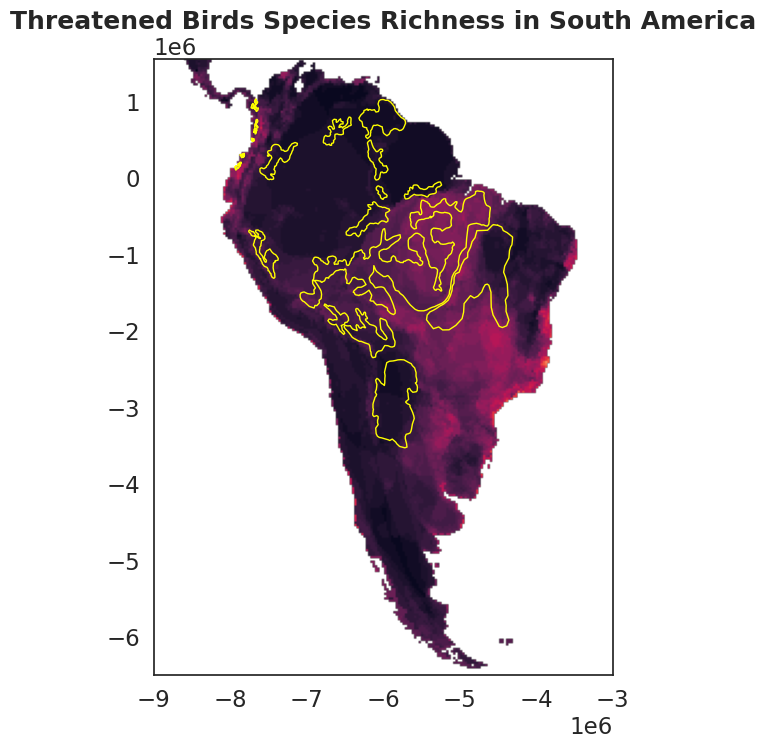

In [94]:
# Croppped Map of South America:


fig, ax = plt.subplots(figsize=(8, 8))

ax.set_ylim((-6500000, 1550000))
ax.set_xlim((-9000000, -3000000))

rasterio.plot.show(src_tif, src_ovr, ax=ax, title="Threatened Birds Species Richness in South America")
deforest.plot(ax=ax, edgecolor="yellow", facecolor="none", lw=1)

#### Analysis from above: Based on the mapping above, there is possibly evidence that could support that deforestation is forcing threatened bird species to migrate/relocate southeast toward the Brazilian coastline. In general, deforestation in South America is occuring on the outer edge of where dense populations of threatened bird species reside.

### Analysis 2: Overlaying Maps of Threatented Bird Species and Projected Bioclimatic Variables (2021 - 2040)

Goal of Analysis: Determine whether deforestation is potentially forcing birds to reside in different habitats then it would otherwise.

In [17]:
worldBound_path = os.path.join("data", "spatial-vector-lidar", "global",
                               "ne_110m_land", "ne_110m_land.shp")
worldBound = gpd.read_file(worldBound_path)

In [99]:
'''Importing in the bioclimatic data map that was uploaded into Google Drive '''
climData = "/content/drive/MyDrive/BIOL108/climData/wc2.1_10m_bioc_ACCESS-CM2_ssp126_2021-2040.tif"

clim_tif = rasterio.open(climData)

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': nan,
 'width': 2160,
 'height': 1080,
 'count': 19,
 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'),
 'transform': Affine(0.16666666666666666, 0.0, -180.0,
        0.0, -0.16666666666666666, 90.0)}

In [111]:
## Checking the CRS of climData variable to see if it matches the CRS of deforestation/species richness data:

clim_tif.crs



CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]')

In [110]:
deforest.crs

<Projected CRS: ESRI:54009>
Name: World_Mollweide
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Mollweide
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### (Unsuccessfully) Attempting to Reproject the CRS of the climatic variables vector data to match that of the Deforestation/Species Richness Variables from Above. I was trying to follow the guide from [Geocomputation with Python Chapter 6](https://py.geocompx.org/06-reproj#sec-geometry-operations-on-projected-and-unprojected-data), but was unable to successfully reproject the CRS of the climatic data.

In [117]:

clim_tif.to_crs(54009)

AttributeError: 'DatasetReader' object has no attribute 'to_crs'

##### Since I was unable to determine how to reproject the Climatic Data, I was unable to layer the two/three maps together to identify any possible correlations that could stem from the three differnt variables. If successful, I would have recolored the birds species richness map to contrast the climatic data more dramatically. Then, plot the deforestation raster data to theorize/hypothesize the implications of birds' dispalcement caused by deforestation.

<Axes: title={'center': 'Projected Bioclimatic Variables 2021-2040'}>

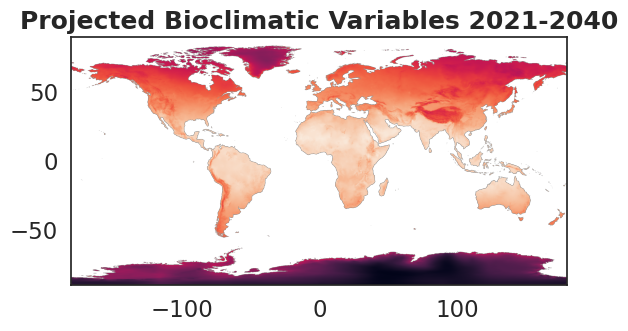

In [119]:
#plotting first layer/part of the raster data image

fig, ax = plt.subplots()
deforest.plot(ax=ax, edgecolor="yellow", facecolor="none", lw=1)
rasterio.plot.show(clim_tif, ax=ax, title = 'Projected Bioclimatic Variables 2021-2040')
